In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import pylab
import scikitplot as skplt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import chi2, chi2_contingency
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
os.chdir('E:\Edwisor\Project_1')

In [2]:
df = pd.read_csv('bank-loan.csv')

In [3]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
df.shape

(850, 9)

In [5]:
df.tail()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN
849,37,1,20,13,41,12.9,0.899130,4.389870,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


### The 0 in default column means that the Applicant is Not-Default and 1 means that the Applicant is Defaut

In [7]:
for col in df.columns:
    print('{} has {}% of Null Values i.e. has {} Null values'.format(col, (df[col].isnull().sum()*100/len(df)), df[col].isnull().sum()))

age has 0.0% of Null Values i.e. has 0 Null values
ed has 0.0% of Null Values i.e. has 0 Null values
employ has 0.0% of Null Values i.e. has 0 Null values
address has 0.0% of Null Values i.e. has 0 Null values
income has 0.0% of Null Values i.e. has 0 Null values
debtinc has 0.0% of Null Values i.e. has 0 Null values
creddebt has 0.0% of Null Values i.e. has 0 Null values
othdebt has 0.0% of Null Values i.e. has 0 Null values
default has 17.647058823529413% of Null Values i.e. has 150 Null values


### As the Null Values are present in the Target column, I will drop the rows containing missing values as imputing to avoid any artificial increase in relationships with independent variables.

In [8]:
df_check_imputation = df.loc[:6]
df_check_imputation['ed'] = df_check_imputation['ed'].astype(str)
df_check_imputation['address'] = df_check_imputation['address'].astype(str)
df_check_imputation['employ'] = df_check_imputation['employ'].astype(str)
df_check_imputation['default'] = df_check_imputation['default'].replace({1.0 : 1, 0.0 : 0})
median = df_check_imputation['default'].median()
mode = df_check_imputation['default'].mode()

original_value = df_check_imputation.iloc[3,8]
df_check_imputation.iloc[4,8] = np.nan
imputer = KNNImputer(n_neighbors = 3)
df_after_imputation = pd.DataFrame(imputer.fit_transform(df_check_imputation), columns = df_check_imputation.columns)
df_after_imputation.iloc[4,8]
print('median: {}, mode: {}, KNN_Impute: {}'.format(median, mode, df_after_imputation.iloc[3,8]))

median: 0.0, mode: 0    0.0
dtype: float64, KNN_Impute: 0.0


<ipython-input-8-4a6069c1a4cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check_imputation['ed'] = df_check_imputation['ed'].astype(str)
<ipython-input-8-4a6069c1a4cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check_imputation['address'] = df_check_imputation['address'].astype(str)
<ipython-input-8-4a6069c1a4cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   699 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [10]:
df['default'] = df['default'].replace({1.0 : 1, 0.0 : 0})

In [11]:
df_1 = df.copy()          # Making a copy of the dataframe
df_1.dropna(inplace = True)  # Dropping the NA values

In [12]:
df_1.shape

(699, 9)

In [13]:
df_1['ed'] = df_1['ed'].astype(str)
df_1['address'] = df_1['address'].astype(str)
df_1['employ'] = df_1['employ'].astype(str)

### We convert these features from numeric to categorical as these features originally were different categories which are converted to numeric

In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       699 non-null    int64  
 1   ed        699 non-null    object 
 2   employ    699 non-null    object 
 3   address   699 non-null    object 
 4   income    699 non-null    int64  
 5   debtinc   699 non-null    float64
 6   creddebt  699 non-null    float64
 7   othdebt   699 non-null    float64
 8   default   699 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 54.6+ KB


C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


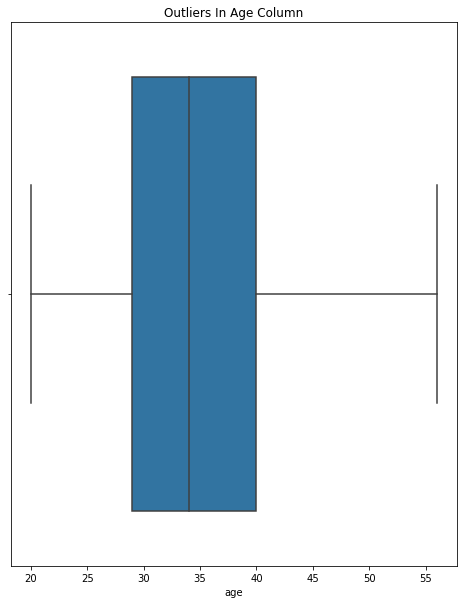

In [15]:
plt.figure(figsize = (8, 10))
sns.boxplot('age', data = df_1)
plt.title('Outliers In Age Column')      # Checking for outliers in Age Column
plt.savefig('Outliers In Age Columns.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


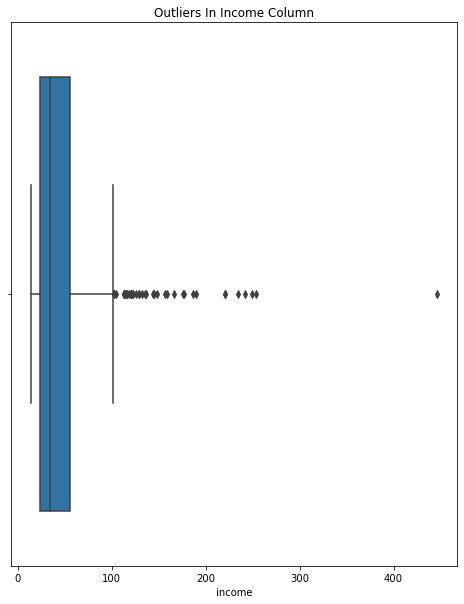

In [16]:
plt.figure(figsize = (8, 10))
sns.boxplot('income', data = df_1)
plt.title('Outliers In Income Column')      #Checking for outliers in Income Column
plt.savefig('Outliers in Income column.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

### In Income categories the outliers may be due to some of the persons earning a huge amount genuinly and thus the outliers need not be removed. But to be on the safe side I will compare the model with and without the outliers.

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


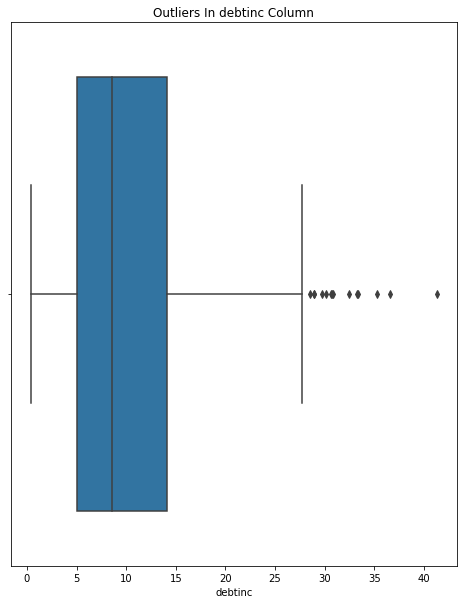

In [17]:
plt.figure(figsize = (8, 10))
sns.boxplot('debtinc', data = df_1)
plt.title('Outliers In debtinc Column')      #Checking for outliers in debtinc Column
plt.savefig('Outliers In Debtinc Column.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

### In Debtinc categories the outliers may be due to some of the persons may have higher debt to their gross income and thus the outliers need not be removed. But to be on the safe side I will compare the model with and without the outliers.

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


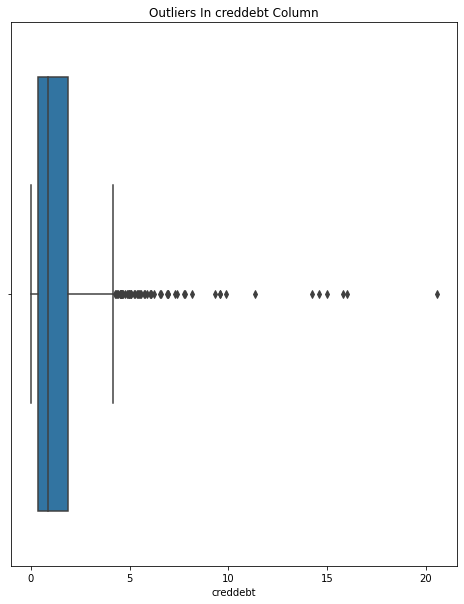

In [18]:
plt.figure(figsize = (8, 10))
sns.boxplot('creddebt', data = df_1)
plt.title('Outliers In creddebt Column')      #Checking for outliers in creddebt Column
plt.savefig('Outliers In creddebt Column.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

### In creddebt categories the outliers may be due to some of the persons may have a high debt-to-credit ratio and thus the outliers need not be removed. But to be on the safe side I will compare the model with and without the outliers.

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


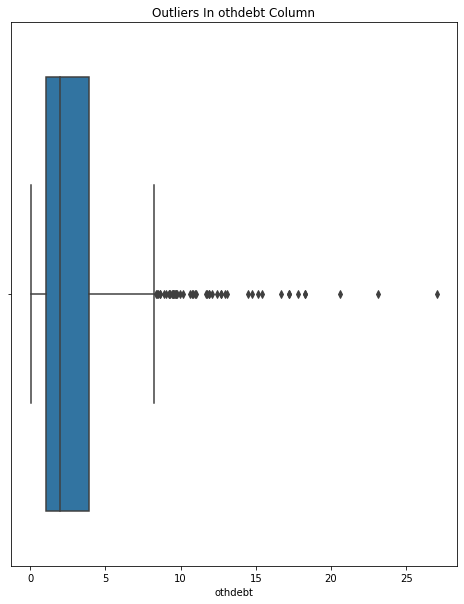

In [19]:
plt.figure(figsize = (8, 10))
sns.boxplot('othdebt', data = df_1)
plt.title('Outliers In othdebt Column')      #Checking for outliers in othdebt Column
plt.savefig('Outliers In othdebt Column.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

In [20]:
num_cols = ['age', 'income', 'debtinc', 'creddebt', 'othdebt']
cat_cols = ['ed', 'employ', 'address']
for col in num_cols:
    df_1[col + '_boxcox'], parameters = stats.boxcox(df_1[col])
    df_1.drop(col, axis = 1, inplace = True)

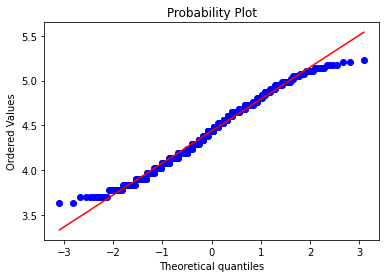

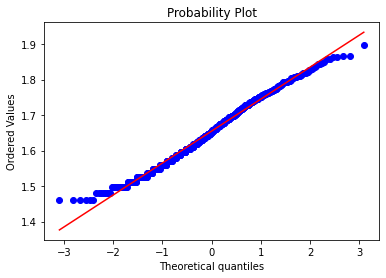

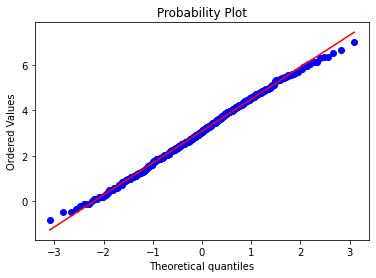

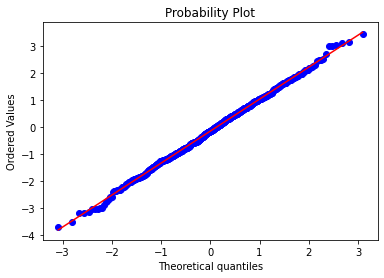

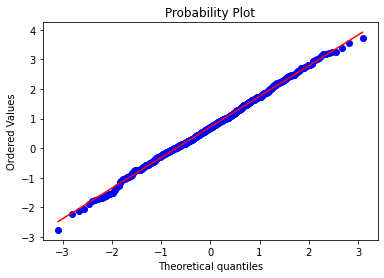

In [21]:
num_cols = ['age_boxcox', 'income_boxcox', 'debtinc_boxcox', 'creddebt_boxcox', 'othdebt_boxcox']
for col in num_cols:
    stats.probplot(df_1[col], dist = 'norm', plot= pylab)
    plt.show()

In [22]:
num_cols = ['age_boxcox', 'income_boxcox', 'debtinc_boxcox', 'creddebt_boxcox', 'othdebt_boxcox']
cat_cols = ['ed', 'employ', 'address']

for i in num_cols:
    print(i)
    # Quartiles and IQR
    q25,q75 = np.percentile(df_1[i],[25,75])
    IQR = q75-q25
    
    # Lower and upper limits 
    LL = q25 - (1.5 * IQR)
    UL = q75 + (1.5 * IQR)
    
    # Capping with ul for maxmimum values 
    # For inliers
    df_1.loc[df_1[i] < LL ,i] = LL 
   # For ioutliers
    df_1.loc[df_1[i] > UL ,i] = UL 
     

age_boxcox
income_boxcox
debtinc_boxcox
creddebt_boxcox
othdebt_boxcox


C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


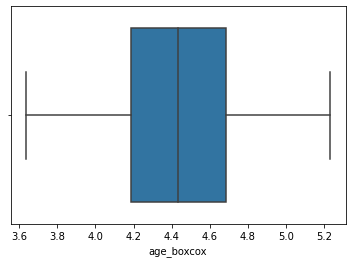

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


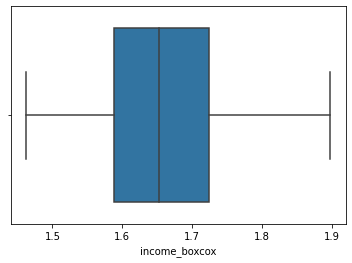

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


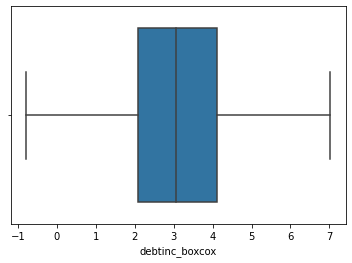

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


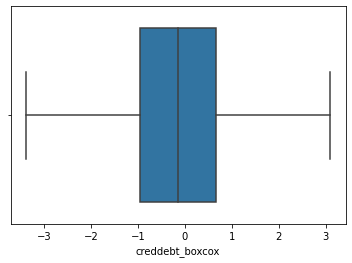

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


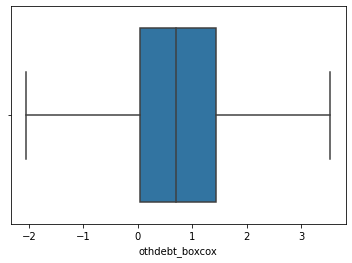

In [23]:
for col in num_cols:
    sns.boxplot(col, data = df_1)
    plt.show()

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


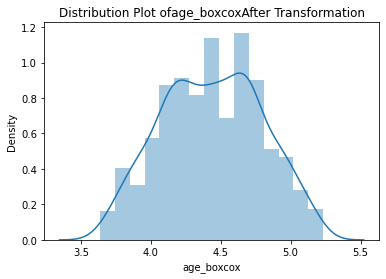

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


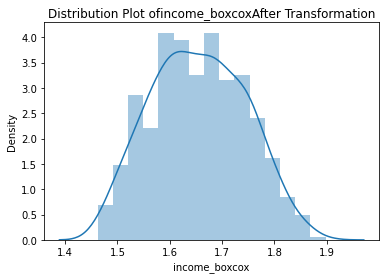

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


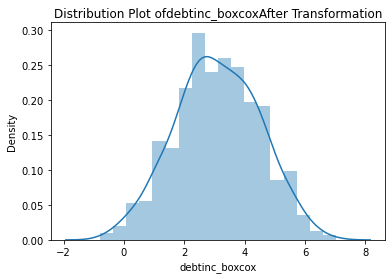

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


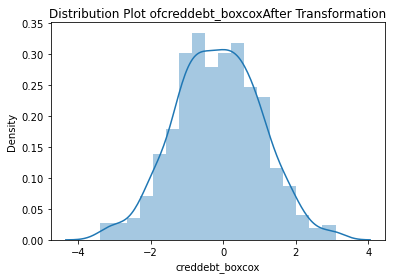

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


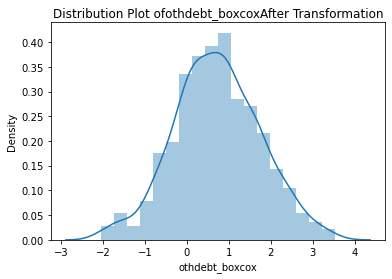

In [24]:
for col in num_cols:
    sns.distplot(df_1[col])
    plt.title('Distribution Plot of' + col + 'After Transformation')
    plt.savefig('Distribution Plot of' + col + 'After Transformation.jpg', dpi = 500)
    plt.show()

<Figure size 576x720 with 0 Axes>

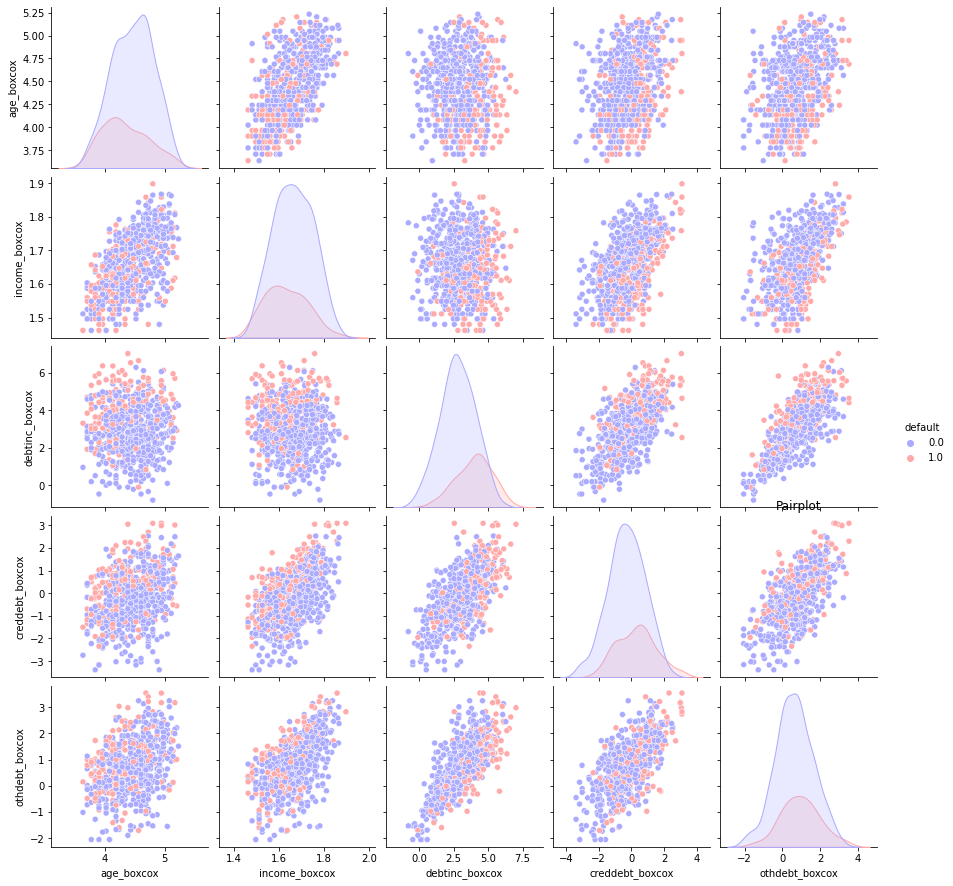

In [25]:
plt.figure(figsize = (8, 10))
sns.pairplot(df_1, hue = 'default',palette='bwr')
plt.title('Pairplot')                                     # Value Counts of Default Column
plt.savefig('Pairplot.jpg', dpi = 500)                    #Saving Figure in the working directory
plt.show()

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


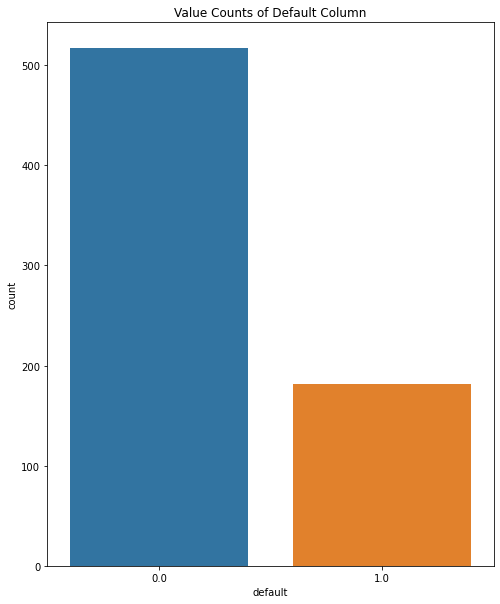

In [26]:
plt.figure(figsize = (8, 10))
sns.countplot('default', data = df)
plt.title('Value Counts of Default Column')                                     # Value Counts of Default Column
plt.savefig('Value Counts of Default Column.jpg', dpi = 500)                    #Saving Figure in the working directory
plt.show()

### From the chart above, we can see that the data is imbalanced. We have to cure this situation in fuuture steps.

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


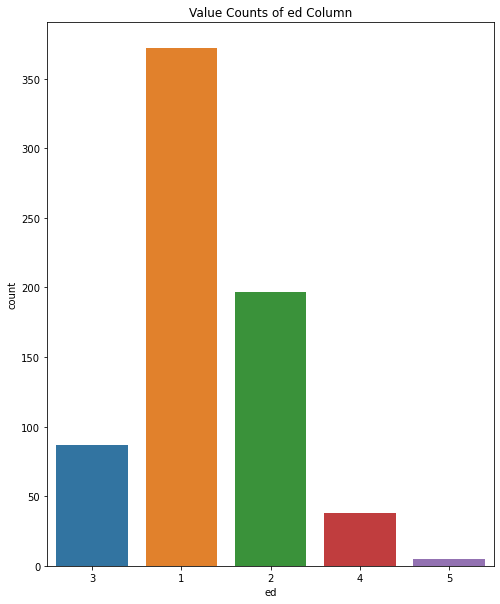

In [27]:
plt.figure(figsize = (8, 10))
sns.countplot('ed', data = df_1)
plt.title('Value Counts of ed Column')                                     # Value Counts of ed Column
plt.savefig('Value Counts of ed Column.jpg', dpi = 500)                    #Saving Figure in the working directory
plt.show()

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


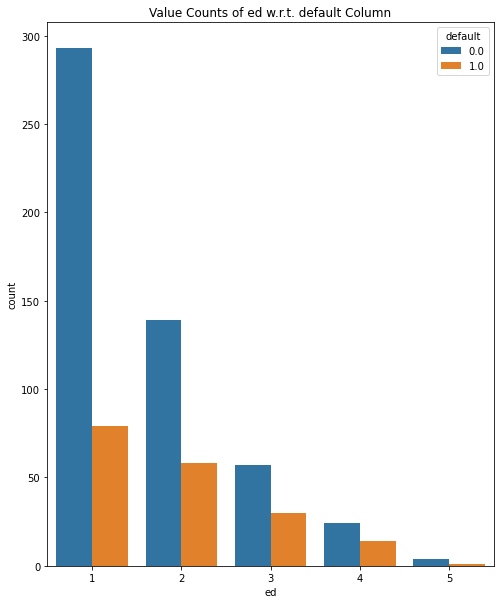

In [28]:
plt.figure(figsize = (8, 10))
sns.countplot('ed', data = df, hue = 'default')
plt.title('Value Counts of ed w.r.t. default Column')                     # Value Counts of ed w.r.t. default Column
plt.savefig('Value Counts of ed w.r.t. default Column.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


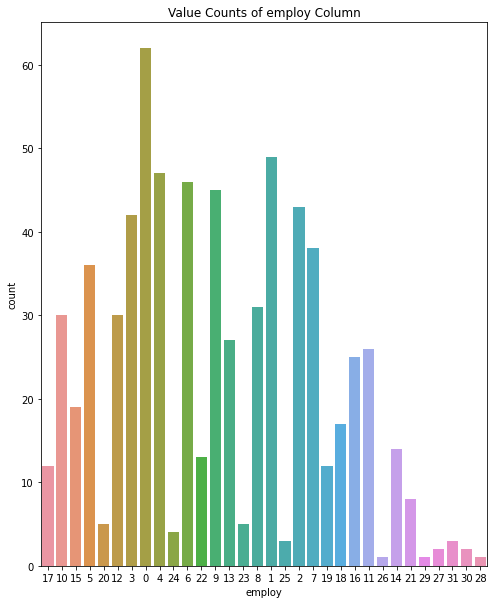

In [29]:
plt.figure(figsize = (8, 10))
sns.countplot('employ', data = df_1)
plt.title('Value Counts of employ Column')                     # Value Counts of employ Column
plt.savefig('Value Counts of employ Column.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

### The Income feature is left skewed

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


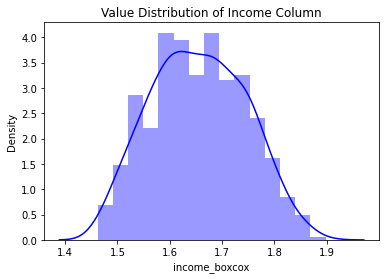

In [30]:
sns.distplot(df_1['income_boxcox'], color = 'b')
plt.title('Value Distribution of Income Column')               # Value Distribution of Income Column
plt.savefig('Value Counts of Income Column.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

### Age is not exactly normally distributed but is very close to normal distribution

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


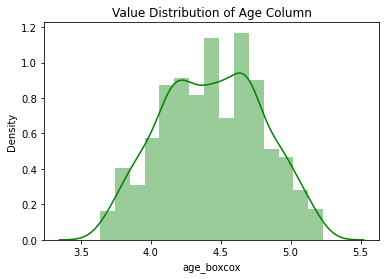

In [31]:
sns.distplot(df_1['age_boxcox'], color = 'g')
plt.title('Value Distribution of Age Column')                        # Value Distribution of Age Column
plt.savefig('Value Distribution of Age Column.jpg', dpi = 500)        # Saving Figure in the working directory
plt.show()

### The debtinc feature is left skewed

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


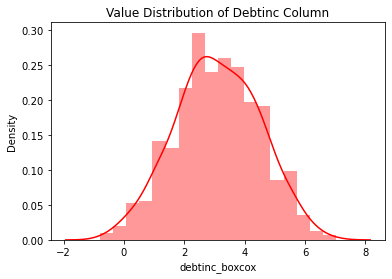

In [32]:
sns.distplot(df_1['debtinc_boxcox'], color = 'r')
plt.title('Value Distribution of Debtinc Column')                     # Value Distribution of Debtinc Column
plt.savefig('Value Distribution of Debtinc Column.jpg', dpi = 500)        # Saving Figure in the working directory
plt.show()

### The creddebt feature is left skewed

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


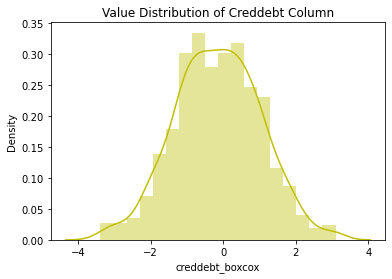

In [33]:
sns.distplot(df_1['creddebt_boxcox'], color = 'y')
plt.title('Value Distribution of Creddebt Column')                     # Value Distribution of Creddebt Column
plt.savefig('Value Distribution of Creddebt Column.jpg', dpi = 500)        # Saving Figure in the working directory
plt.show()

### The othdebt feature is left skewed

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


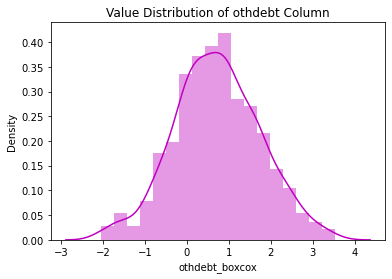

In [34]:
sns.distplot(df_1['othdebt_boxcox'], color = 'm')
plt.title('Value Distribution of othdebt Column')                     # Value Distribution of othdebt Column
plt.savefig('Value Distribution of othdebt Column.jpg', dpi = 500)        # Saving Figure in the working directory
plt.show()

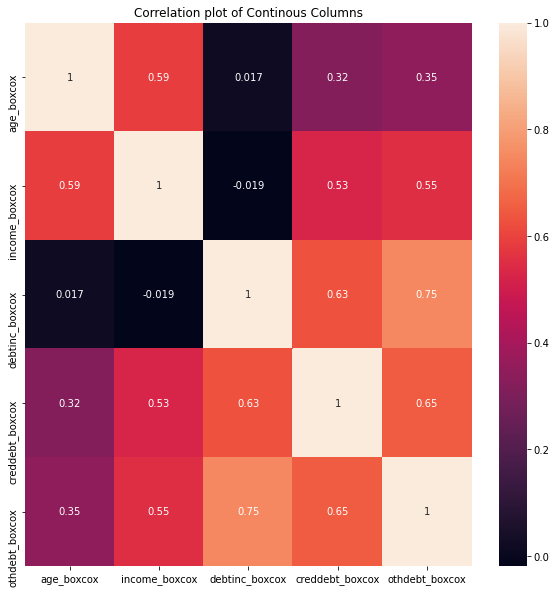

In [35]:
plt.figure(figsize = (10, 10))
corr = df_1.drop(['default'], axis = 1).corr()
sns.heatmap(corr, annot = True)
plt.title('Correlation plot of Continous Columns')   
plt.savefig('Correlation plot of Continous Columns.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

### As none of the correlation value is greater than 0.68 so we can conclude that multi collinearity is not present in the data in numeric features

In [36]:
categorical_cols = ['ed', 'employ', 'address']
for i in categorical_cols:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_1['default'], df_1[i]))
    if p<0.05:
        print('Reject Null Hypothesis i.e. {} and default are dependent.'.format(i))
    else:
        print('Failed to Reject Null Hypothesis i.e. {} and default are independent.'.format(i))

ed
Reject Null Hypothesis i.e. ed and default are dependent.
employ
Reject Null Hypothesis i.e. employ and default are dependent.
address
Reject Null Hypothesis i.e. address and default are dependent.


In [37]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ed               699 non-null    object 
 1   employ           699 non-null    object 
 2   address          699 non-null    object 
 3   default          699 non-null    float64
 4   age_boxcox       699 non-null    float64
 5   income_boxcox    699 non-null    float64
 6   debtinc_boxcox   699 non-null    float64
 7   creddebt_boxcox  699 non-null    float64
 8   othdebt_boxcox   699 non-null    float64
dtypes: float64(6), object(3)
memory usage: 74.6+ KB


### Feature Scaling

In [38]:
num_cols = ['age_boxcox', 'income_boxcox', 'debtinc_boxcox', 'creddebt_boxcox', 'othdebt_boxcox']
cat_cols = ['ed', 'employ', 'address']

        
num_cols, cat_cols

(['age_boxcox',
  'income_boxcox',
  'debtinc_boxcox',
  'creddebt_boxcox',
  'othdebt_boxcox'],
 ['ed', 'employ', 'address'])

In [39]:
df_1_numeric = df_1[num_cols]
df_1_numeric

,age_boxcox,income_boxcox,debtinc_boxcox,creddebt_boxcox,othdebt_boxcox
0,4.727344,1.842489,3.220801,2.704071,1.711499
1,4.079538,1.636046,4.593139,0.313268,1.460382
2,4.688102,1.724810,2.249835,-0.154358,0.796921
3,4.727344,1.811036,1.262676,1.020354,-0.195459
5,4.727344,1.595570,3.408606,-0.897951,0.791229
...,...,...,...,...,...
695,4.522020,1.610556,1.954135,-1.264581,-0.020251
696,4.187966,1.559398,3.660709,-0.953985,0.735001
697,4.386504,1.641658,2.828729,-0.689382,0.679662
698,4.876377,1.766166,3.020032,0.864839,1.505138


### As the numeric data is close to normally distributed, we have to use Standardization

In [40]:
# Scaling the continous variables
scaler = StandardScaler()
df_1_num_scaled = scaler.fit_transform(df_1_numeric)
df_1_num_scaled = pd.DataFrame(df_1_num_scaled, columns = df_1_numeric.columns)
df_1_num_scaled

,age_boxcox,income_boxcox,debtinc_boxcox,creddebt_boxcox,othdebt_boxcox
0,0.812324,2.082358,0.090570,2.425334,0.966375
1,-0.997694,-0.210014,1.070328,0.393475,0.721504
2,0.702681,0.775628,-0.602634,-0.003945,0.074541
3,0.812324,1.733096,-1.307399,0.994402,-0.893160
4,0.812324,-0.659464,0.224651,-0.635898,0.068991
...,...,...,...,...,...
694,0.238635,-0.493056,-0.813744,-0.947484,-0.722309
695,-0.694737,-1.061122,0.404636,-0.683519,0.014161
696,-0.140007,-0.147697,-0.189342,-0.458643,-0.039802
697,1.228735,1.234856,-0.052765,0.862235,0.765146


### Creating dummy variables of Categorical columns

In [41]:
df_1_cat = df_1['default']
for i in cat_cols:
    temporary = pd.get_dummies(df_1[i], prefix= i, drop_first= True)
    df_1_cat = pd.merge(df_1_cat, temporary, right_index= True, left_index= True)
df_1_cat

,default,ed_2,ed_3,ed_4,ed_5,employ_1,employ_10,employ_11,employ_12,employ_13,...,address_29,address_3,address_31,address_34,address_4,address_5,address_6,address_7,address_8,address_9
0,1.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
697,0.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
698,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Making final dataframe from encoded and scaled dataframe
df_1_final = pd.merge(df_1_num_scaled, df_1_cat, right_index= True, left_index= True)
df_1_final

,age_boxcox,income_boxcox,debtinc_boxcox,creddebt_boxcox,othdebt_boxcox,default,ed_2,ed_3,ed_4,ed_5,...,address_29,address_3,address_31,address_34,address_4,address_5,address_6,address_7,address_8,address_9
0,0.812324,2.082358,0.090570,2.425334,0.966375,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.997694,-0.210014,1.070328,0.393475,0.721504,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.702681,0.775628,-0.602634,-0.003945,0.074541,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.812324,1.733096,-1.307399,0.994402,-0.893160,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.590613,1.054351,2.153886,1.338323,2.348609,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0.238635,-0.493056,-0.813744,-0.947484,-0.722309,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
695,-0.694737,-1.061122,0.404636,-0.683519,0.014161,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,-0.140007,-0.147697,-0.189342,-0.458643,-0.039802,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
697,1.228735,1.234856,-0.052765,0.862235,0.765146,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [43]:
# Doing the dependent and independent variables seperate
X_1 = df_1_final.drop(['default'], axis = 1)    
y_1 = df_1_final['default']

In [44]:
X_1.shape, y_1.shape

((698, 70), (698,))

### Making the data balanced

In [45]:
smt = SMOTETomek(random_state = 0)
X_1_balance, y_1_balance = smt.fit_resample(X_1, y_1)

In [46]:
y_1.value_counts(), y_1_balance.value_counts()

(0.0    516
 1.0    182
 Name: default, dtype: int64,
 0.0    513
 1.0    513
 Name: default, dtype: int64)

In [47]:
# Train and Test Split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1_balance, y_1_balance, test_size = 0.2, random_state = 0, stratify = y_1_balance)

### Logistic Regression

In [48]:
lr = LogisticRegression()
lr.fit(X_1_train, y_1_train)

LogisticRegression()

In [49]:
lr_pred = lr.predict(X_1_test)

In [50]:
conf = confusion_matrix(y_1_test, lr_pred)
conf

array([[89, 14],
       [17, 86]], dtype=int64)

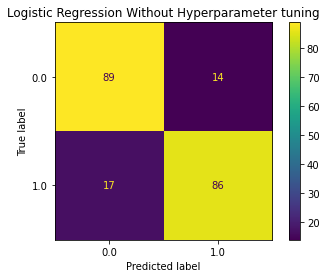

In [51]:
plot_confusion_matrix(lr, X_1_test, y_1_test)  
plt.title('Logistic Regression Without Hyperparameter tuning')
plt.savefig('Confusion Matric of Logistic Regression Without Hyperparameter tuning.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show() 

In [52]:
TP = conf[0][0]
TN = conf[1][1]
FN = conf[0][1]
FP = conf[1][0]
print('TP in Logistic Regression without Hyperparameter Tuning:', TP)
print('TN in Logistic Regression without Hyperparameter Tuning:', TN)
print('FN in Logistic Regression without Hyperparameter Tuning:', FN)
print('FP in Logistic Regression without Hyperparameter Tuning:', FP)

TP in Logistic Regression without Hyperparameter Tuning: 89
TN in Logistic Regression without Hyperparameter Tuning: 86
FN in Logistic Regression without Hyperparameter Tuning: 14
FP in Logistic Regression without Hyperparameter Tuning: 17


In [53]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Specificity = TN/(TN+FP)
f_1_score = (2*Precision*Recall)/(Precision + Recall)
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('Precision in Logistic Regression without Hyperparameter Tuning::', Precision)
print('Recall in Logistic Regression without Hyperparameter Tuning::', Recall)
print('F 1 Score in Logistic Regression without Hyperparameter Tuning::', f_1_score)
print('Accuracy in Logistic Regression without Hyperparameter Tuning::', Accuracy)

Precision in Logistic Regression without Hyperparameter Tuning:: 0.839622641509434
Recall in Logistic Regression without Hyperparameter Tuning:: 0.8640776699029126
F 1 Score in Logistic Regression without Hyperparameter Tuning:: 0.8516746411483254
Accuracy in Logistic Regression without Hyperparameter Tuning:: 0.8495145631067961


In [54]:
lr_pred_proba = lr.predict_proba(X_1_test)

In [55]:
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_1_test, lr_pred_proba[:,1], pos_label=1)

In [56]:
roc_curve(y_1_test, lr_pred_proba[:,1], pos_label=1)

(array([0.        , 0.        , 0.        , 0.00970874, 0.00970874,
        0.02912621, 0.02912621, 0.03883495, 0.03883495, 0.04854369,
        0.04854369, 0.05825243, 0.05825243, 0.06796117, 0.06796117,
        0.0776699 , 0.0776699 , 0.08737864, 0.08737864, 0.09708738,
        0.09708738, 0.10679612, 0.10679612, 0.11650485, 0.11650485,
        0.12621359, 0.12621359, 0.15533981, 0.15533981, 0.16504854,
        0.16504854, 0.21359223, 0.21359223, 0.25242718, 0.25242718,
        0.26213592, 0.26213592, 0.27184466, 0.27184466, 0.38834951,
        0.38834951, 0.45631068, 0.45631068, 0.59223301, 0.59223301,
        0.61165049, 0.61165049, 0.66990291, 0.66990291, 0.72815534,
        0.72815534, 0.74757282, 0.74757282, 0.95145631, 0.95145631,
        1.        ]),
 array([0.        , 0.00970874, 0.38834951, 0.38834951, 0.48543689,
        0.48543689, 0.51456311, 0.51456311, 0.54368932, 0.54368932,
        0.5631068 , 0.5631068 , 0.57281553, 0.57281553, 0.58252427,
        0.58252427, 0.6019

In [57]:
random_probs = [0 for i in range(len(y_1_test))]
p_fpr, p_tpr, _ = roc_curve(y_1_test, random_probs, pos_label=1)

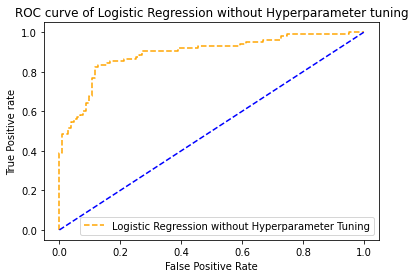

In [58]:
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='orange', label='Logistic Regression without Hyperparameter Tuning')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve of Logistic Regression without Hyperparameter tuning')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_Cirve of Logistic Regression without Hyperparameter Tuning.jpg',dpi=500)     # Saving Figure in the working directory
plt.show()

In [59]:
print('roc_auc_score for Logistic Regression without Hyperparameter tuning:', roc_auc_score(y_1_test, lr_pred_proba[:,1]))
score = roc_auc_score(y_1_test, lr_pred_proba[:,1])
Logistic_Regression = [Precision, Recall, f_1_score, TP, TN, FP, FN, Accuracy, score]

roc_auc_score for Logistic Regression without Hyperparameter tuning: 0.8926383259496653


### There are 14 False Possitive values in the result. Let's try Hyperparameter Optimization and try to reduce them as in this problem statement, we want to reduce the count of False Possitive so that our business did not get affected adversely.

In [64]:
lr_params = {'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear'],            
            'C' : [100, 10, 1.0, 0.1, 0.01]}
# Solver is liblinear As the dataset is small
rscv_lr = GridSearchCV(estimator= lr, param_grid = lr_params, cv = 10, verbose= 2, scoring = 'f1')
rscv_lr.fit(X_1_train, y_1_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] .............. C=100, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] .............. C=100, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] .............. C=100, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] .............. C=100, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] .............. C=100, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] .............. C=100, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. C=100, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] .............. C=100, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] .............. C=100, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] .............. C=100, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] .............. C=100, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] .............. C=100, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] .............. C=100, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1', verbose=2)

In [65]:
rscv_lr_pred = rscv_lr.predict(X_1_test)

In [66]:
conf = confusion_matrix(y_1_test, rscv_lr_pred)
conf

array([[90, 13],
       [21, 82]], dtype=int64)

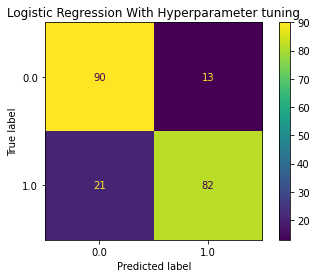

In [67]:
plot_confusion_matrix(rscv_lr, X_1_test, y_1_test) 
plt.title('Logistic Regression With Hyperparameter tuning')
plt.savefig('Confusion Matrix of Logistic Regression With Hyperparameter tuning.jpg', dpi = 500)
plt.show() 

In [68]:
TP = conf[0][0]
TN = conf[1][1]
FN = conf[0][1]
FP = conf[1][0]
print('TP in Logistic Regression with Hyperparameter Tuning:', TP)
print('TN in Logistic Regression with Hyperparameter Tuning:', TN)
print('FN in Logistic Regression with Hyperparameter Tuning:', FN)
print('FP in Logistic Regression with Hyperparameter Tuning:', FP)

TP in Logistic Regression with Hyperparameter Tuning: 90
TN in Logistic Regression with Hyperparameter Tuning: 82
FN in Logistic Regression with Hyperparameter Tuning: 13
FP in Logistic Regression with Hyperparameter Tuning: 21


In [69]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Specificity = TN/(TN+FP)
f_1_score = (2*Precision*Recall)/(Precision + Recall)
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy in Logistic Regression with Hyperparameter Tuning::', Accuracy)
print('Precision in Logistic Regression with Hyperparameter Tuning::', Precision)
print('Recall in Logistic Regression with Hyperparameter Tuning::', Recall)
print('F1 Score in Logistic Regression with Hyperparameter Tuning::', f_1_score)

Accuracy in Logistic Regression with Hyperparameter Tuning:: 0.8349514563106796
Precision in Logistic Regression with Hyperparameter Tuning:: 0.8108108108108109
Recall in Logistic Regression with Hyperparameter Tuning:: 0.8737864077669902
F1 Score in Logistic Regression with Hyperparameter Tuning:: 0.8411214953271028


In [70]:
rscv_lr_pred_proba = rscv_lr.predict_proba(X_1_test)

In [71]:
fpr_rscv_lr, tpr_rscv_lr, thresh_rscv_lr = roc_curve(y_1_test, rscv_lr_pred_proba[:,1], pos_label=1)

In [72]:
roc_curve(y_1_test, rscv_lr_pred_proba[:,1], pos_label=1)

(array([0.        , 0.        , 0.        , 0.00970874, 0.00970874,
        0.01941748, 0.01941748, 0.02912621, 0.02912621, 0.04854369,
        0.04854369, 0.05825243, 0.05825243, 0.06796117, 0.06796117,
        0.0776699 , 0.0776699 , 0.10679612, 0.10679612, 0.12621359,
        0.12621359, 0.14563107, 0.14563107, 0.17475728, 0.17475728,
        0.22330097, 0.22330097, 0.29126214, 0.29126214, 0.40776699,
        0.40776699, 0.4368932 , 0.4368932 , 0.51456311, 0.51456311,
        0.53398058, 0.53398058, 0.54368932, 0.54368932, 0.73786408,
        0.73786408, 0.85436893, 0.85436893, 0.89320388, 0.89320388,
        0.90291262, 0.90291262, 0.93203883, 0.93203883, 1.        ]),
 array([0.        , 0.00970874, 0.46601942, 0.46601942, 0.48543689,
        0.48543689, 0.50485437, 0.50485437, 0.53398058, 0.53398058,
        0.62135922, 0.62135922, 0.67961165, 0.67961165, 0.7184466 ,
        0.7184466 , 0.75728155, 0.75728155, 0.7961165 , 0.7961165 ,
        0.83495146, 0.83495146, 0.84466019, 0.

In [73]:
random_probs = [0 for i in range(len(y_1_test))]
p_fpr_rscv_lr, p_tpr_rscv_lr, _ = roc_curve(y_1_test, random_probs, pos_label=1)

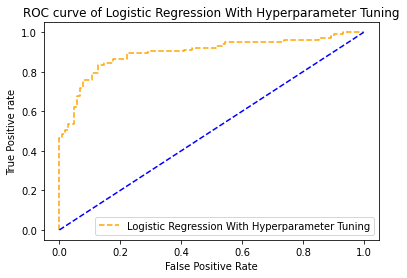

In [74]:
plt.plot(fpr_rscv_lr, tpr_rscv_lr, linestyle='--',color='orange', label='Logistic Regression With Hyperparameter Tuning')
plt.plot(p_fpr_rscv_lr, p_tpr_rscv_lr, linestyle='--', color='blue')
# title
plt.title('ROC curve of Logistic Regression With Hyperparameter Tuning')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_Curve of Logistic Regression With Hyperparameter Tuning.jpg',dpi=500)
plt.show()

In [75]:
print('roc_auc_score for Logistic Regression with Hyperparameter tuning:', roc_auc_score(y_1_test, rscv_lr_pred_proba[:,1]))
score = roc_auc_score(y_1_test, rscv_lr_pred_proba[:,1])
Logistic_Regression_With_hyperparaeter_tuning = [Precision, Recall, f_1_score, TP, TN, FP, FN, Accuracy, score]

roc_auc_score for Logistic Regression with Hyperparameter tuning: 0.8965029691771138


### Seeing the Lift Curve and the False Possitive values, we can say that the Logistic Regression with Hyperparameter Tuning is better that Logistic Regression

### Naive Bayes

### I did not use Naive Bayes for classification as it assumes that the features are completely independent of each other but as we saw above in the correlation matrix and Chi Square test, the features are not independent and thus it violates the basic assumption of Naive Bayes.

### Decision Tree Classifier

In [78]:
dt = DecisionTreeClassifier(random_state= 0)
dt.fit(X_1_train, y_1_train)

DecisionTreeClassifier(random_state=0)

In [79]:
dt_pred = dt.predict(X_1_test)

In [80]:
conf_dt = confusion_matrix(y_1_test, dt_pred)
conf_dt

array([[79, 24],
       [21, 82]], dtype=int64)

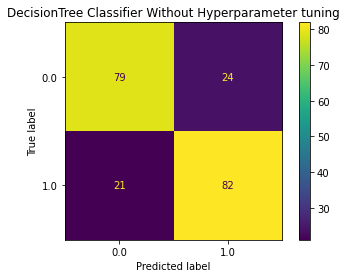

In [81]:
plot_confusion_matrix(dt, X_1_test, y_1_test)  
plt.title('DecisionTree Classifier Without Hyperparameter tuning')
plt.savefig('Confusion matrix of DecisionTree Classifier Without Hyperparameter tuning.jpg', dpi = 500)
plt.show() 

In [82]:
TP = conf_dt[0][0]
TN = conf_dt[1][1]
FN = conf_dt[0][1]
FP = conf_dt[1][0]
print('TP of Decision Tree Without Hyperparameter Tuning:', TP)
print('TN of Decision Tree Without Hyperparameter Tuning:', TN)
print('FN of Decision Tree Without Hyperparameter Tuning:', FN)
print('FP of Decision Tree Without Hyperparameter Tuning:', FP)

TP of Decision Tree Without Hyperparameter Tuning: 79
TN of Decision Tree Without Hyperparameter Tuning: 82
FN of Decision Tree Without Hyperparameter Tuning: 24
FP of Decision Tree Without Hyperparameter Tuning: 21


In [83]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Specificity = TN/(TN+FP)
f_1_score = (2*Precision*Recall)/(Precision + Recall)
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy in Decision Tree without Hyperparameter Tuning::', Accuracy)
print('Precision of Decision Tree Without Hyperparameter Tuning:', Precision)
print('Recall of Decision Tree Without Hyperparameter Tuning:', Recall)
print('F1 Score of Decision Tree Without Hyperparameter Tuning:', f_1_score)

Accuracy in Decision Tree without Hyperparameter Tuning:: 0.7815533980582524
Precision of Decision Tree Without Hyperparameter Tuning: 0.79
Recall of Decision Tree Without Hyperparameter Tuning: 0.7669902912621359
F1 Score of Decision Tree Without Hyperparameter Tuning: 0.7783251231527093


In [84]:
dt_pred_proba = dt.predict_proba(X_1_test)

In [85]:
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_1_test, dt_pred_proba[:,1], pos_label=1)

In [86]:
roc_curve(y_1_test, dt_pred_proba[:,1], pos_label=1)

(array([0.        , 0.23300971, 1.        ]),
 array([0.       , 0.7961165, 1.       ]),
 array([2., 1., 0.]))

In [87]:
random_probs = [0 for i in range(len(y_1_test))]
p_fpr_dt, p_tpr_dt, _ = roc_curve(y_1_test, random_probs, pos_label=1)

In [88]:
p_fpr_dt, p_tpr_dt

(array([0., 1.]), array([0., 1.]))

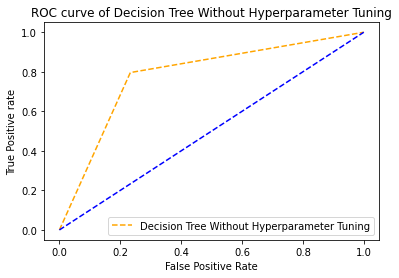

In [89]:
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='orange', label='Decision Tree Without Hyperparameter Tuning')
plt.plot(p_fpr_dt, p_tpr_dt, linestyle='--', color='blue')
# title
plt.title('ROC curve of Decision Tree Without Hyperparameter Tuning')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_Curve of Decision Tree Without Hyperparameter Tuning.jpg',dpi=500)
plt.show()

In [90]:
print('roc_auc_score for Decision Tree without Hyperparameter tuning:', roc_auc_score(y_1_test, dt_pred_proba[:,1]))
score  = roc_auc_score(y_1_test, dt_pred_proba[:,1])
Decision_Tree_Without_hyperparaeter_tuning = [Precision, Recall, f_1_score, TP, TN, FP, FN, Accuracy, score]

roc_auc_score for Decision Tree without Hyperparameter tuning: 0.7815533980582525


### Decision Tree With Hyperparameter Tuning

In [93]:
dt_params = {'max_features' : ['auto', 'sqrt', 'log2', None],
             'ccp_alpha' : [0.0, 0.001, 0.01, 0.1, 1],
             "min_samples_leaf": [1, 2, 3, 4, 9]}
rscv_dt = GridSearchCV(estimator= dt, param_grid= dt_params, cv = 10, verbose= 2, scoring = 'f1')

In [94]:
rscv_dt.fit(X_1_train, y_1_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] ccp_alpha=0.0, max_features=auto, min_samples_leaf=1 ............
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_leaf=1 ............
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_leaf=1 ............
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_leaf=1 ............
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_leaf=1 ............
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_leaf=1 ............
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_leaf=1 .......

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  ccp_alpha=0.0, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_leaf=3 ............
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_leaf=3 ............
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_leaf=3 ............
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_leaf=3 ............
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_leaf=4 ............
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_leaf=4, total=   0.0s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_leaf=4 ............
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_leaf=4, total=   0.0s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_leaf=

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.7s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 9]},
             scoring='f1', verbose=2)

In [95]:
rscv_dt_pred = rscv_dt.predict(X_1_test)

In [96]:
conf = confusion_matrix(y_1_test, rscv_dt_pred)
conf

array([[83, 20],
       [19, 84]], dtype=int64)

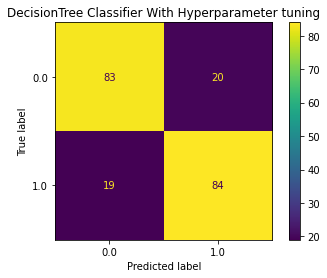

In [97]:
plot_confusion_matrix(rscv_dt, X_1_test, y_1_test)  
plt.title('DecisionTree Classifier With Hyperparameter tuning')
plt.savefig('Confusion_Matrix of DecisionTree Classifier With Hyperparameter tuning.jpg', dpi = 500)
plt.show() 

In [98]:
TP = conf[0][0]
TN = conf[1][1]
FN = conf[0][1]
FP = conf[1][0]
print('TP of Decision Tree With Hyperparameter Tuning:', TP)
print('TN of Decision Tree With Hyperparameter Tuning:', TN)
print('FN of Decision Tree With Hyperparameter Tuning:', FN)
print('FP of Decision Tree With Hyperparameter Tuning:', FP)

TP of Decision Tree With Hyperparameter Tuning: 83
TN of Decision Tree With Hyperparameter Tuning: 84
FN of Decision Tree With Hyperparameter Tuning: 20
FP of Decision Tree With Hyperparameter Tuning: 19


In [99]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Specificity = TN/(TN+FP)
f_1_score = (2*Precision*Recall)/(Precision + Recall)
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy in Decision Tree with Hyperparameter Tuning::', Accuracy)
print('Precision of Decision Tree With Hyperparameter Tuning:', Precision)
print('Recall of Decision Tree With Hyperparameter Tuning:', Recall)
print('F1 Score of Decision Tree With Hyperparameter Tuning:', f_1_score)

Accuracy in Decision Tree with Hyperparameter Tuning:: 0.8106796116504854
Precision of Decision Tree With Hyperparameter Tuning: 0.8137254901960784
Recall of Decision Tree With Hyperparameter Tuning: 0.8058252427184466
F1 Score of Decision Tree With Hyperparameter Tuning: 0.8097560975609757


In [100]:
score = accuracy_score(y_1_test, rscv_dt_pred)
print('Accuracy Score of Decision Tree With Hyperparameter Tuning', score)

Accuracy Score of Decision Tree With Hyperparameter Tuning 0.8106796116504854


In [101]:
rscv_dt_pred_proba = rscv_dt.predict_proba(X_1_test)

In [102]:
fpr_rscv_dt, tpr_rscv_dt, thresh_rscv_dt = roc_curve(y_1_test, rscv_dt_pred_proba[:,1], pos_label=1)

In [103]:
roc_curve(y_1_test, rscv_dt_pred_proba[:,1], pos_label=1)

(array([0.        , 0.09708738, 0.15533981, 0.19417476, 0.2038835 ,
        0.25242718, 0.34951456, 0.36893204, 1.        ]),
 array([0.        , 0.65048544, 0.73786408, 0.81553398, 0.82524272,
        0.82524272, 0.87378641, 0.90291262, 1.        ]),
 array([2.        , 1.        , 0.75      , 0.66666667, 0.5       ,
        0.4       , 0.33333333, 0.25      , 0.        ]))

In [104]:
random_probs = [0 for i in range(len(y_1_test))]
p_fpr_rscv_dt, p_tpr_rscv_dt, _ = roc_curve(y_1_test, random_probs, pos_label=1)

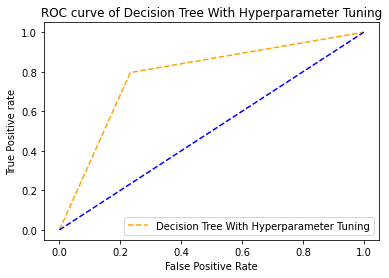

In [105]:
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='orange', label='Decision Tree With Hyperparameter Tuning')
plt.plot(p_fpr_dt, p_tpr_dt, linestyle='--', color='blue')
# title
plt.title('ROC curve of Decision Tree With Hyperparameter Tuning')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC curve of Decision Tree With Hyperparameter Tuning.jpg',dpi=500)
plt.show()

In [106]:
print('roc_auc_score for Decision Tree with Hyperparameter tuning:', roc_auc_score(y_1_test, rscv_dt_pred_proba[:,1]))
score = roc_auc_score(y_1_test, rscv_dt_pred_proba[:,1])
Decision_Tree_With_hyperparaeter_tuning = [Precision, Recall, f_1_score, TP, TN, FP, FN, Accuracy, score]

roc_auc_score for Decision Tree with Hyperparameter tuning: 0.8503628994250165


### Decision Tree With and Without Hyperparameter Optimization gives same results

### Random Forest Classifier Without Hyperparameter Optimization

In [111]:
rfc = RandomForestClassifier()
rfc.fit(X_1_train, y_1_train)

RandomForestClassifier()

In [112]:
rfc_pred = rfc.predict(X_1_test)

In [113]:
conf_rfc = confusion_matrix(y_1_test, rfc_pred)
conf_rfc

array([[79, 24],
       [14, 89]], dtype=int64)

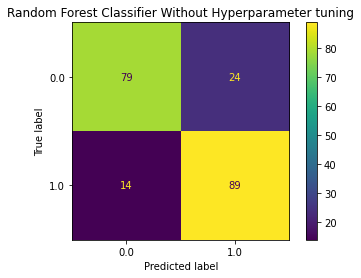

In [114]:
plot_confusion_matrix(rfc, X_1_test, y_1_test)  
plt.title('Random Forest Classifier Without Hyperparameter tuning')
plt.savefig('Confusion Matrix of Random Forest Classifier Without Hyperparameter tuning.jpg', dpi = 500)
plt.show() 

In [115]:
TP = conf_rfc[0][0]
TN = conf_rfc[1][1]
FN = conf_rfc[0][1]
FP = conf_rfc[1][0]
print('TP of Random Foorest classifier Without Hyperparameter Optimization:', TP)
print('TN of Random Foorest classifier Without Hyperparameter Optimization:', TN)
print('FN of Random Foorest classifier Without Hyperparameter Optimization:', FN)
print('FP of Random Foorest classifier Without Hyperparameter Optimization:', FP)

TP of Random Foorest classifier Without Hyperparameter Optimization: 79
TN of Random Foorest classifier Without Hyperparameter Optimization: 89
FN of Random Foorest classifier Without Hyperparameter Optimization: 24
FP of Random Foorest classifier Without Hyperparameter Optimization: 14


In [116]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Specificity = TN/(TN+FP)
f_1_score = (2*Precision*Recall)/(Precision + Recall)
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy in Random Forest without Hyperparameter Tuning::', Accuracy)
print('Precision of Random Foorest classifier Without Hyperparameter Optimization:', Precision)
print('Recall of Random Foorest classifier Without Hyperparameter Optimization:', Recall)
print('F1 Score of Random Foorest classifier Without Hyperparameter Optimization:', f_1_score)

Accuracy in Random Forest without Hyperparameter Tuning:: 0.8155339805825242
Precision of Random Foorest classifier Without Hyperparameter Optimization: 0.8494623655913979
Recall of Random Foorest classifier Without Hyperparameter Optimization: 0.7669902912621359
F1 Score of Random Foorest classifier Without Hyperparameter Optimization: 0.8061224489795918


In [117]:
rfc_pred_proba = rfc.predict_proba(X_1_test)

In [118]:
fpr_rfc, tpr_rfc, thresh_rfc = roc_curve(y_1_test, rfc_pred_proba[:,1], pos_label=1)

In [119]:
roc_curve(y_1_test, rfc_pred_proba[:,1], pos_label=1)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00970874, 0.00970874, 0.01941748,
        0.01941748, 0.01941748, 0.01941748, 0.01941748, 0.01941748,
        0.01941748, 0.02912621, 0.02912621, 0.04854369, 0.06796117,
        0.06796117, 0.08737864, 0.08737864, 0.09708738, 0.09708738,
        0.09708738, 0.10679612, 0.12621359, 0.13592233, 0.14563107,
        0.14563107, 0.14563107, 0.16504854, 0.17475728, 0.19417476,
        0.2038835 , 0.23300971, 0.24271845, 0.30097087, 0.32038835,
        0.34951456, 0.37864078, 0.40776699, 0.4368932 , 0.44660194,
        0.52427184, 0.54368932, 0.55339806, 0.58252427, 0.62135922,
        0.63106796, 0.67961165, 0.69902913, 0.77669903, 0.78640777,
        0.80582524, 0.84466019, 0.88349515, 0.90291262, 0.9223301 ,
        0.93203883, 0.97087379, 1.        ]),
 array([0.        , 0.01941748, 0.03883495, 0.08737864, 0.09708738,
  

In [120]:
random_probs = [0 for i in range(len(y_1_test))]
p_fpr_rfc, p_tpr_rfc, _ = roc_curve(y_1_test, random_probs, pos_label=1)

In [121]:
p_fpr_rfc, p_tpr_rfc

(array([0., 1.]), array([0., 1.]))

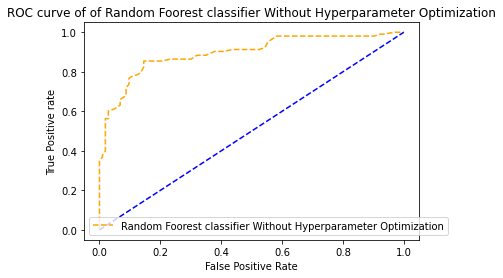

In [122]:
plt.plot(fpr_rfc, tpr_rfc, linestyle='--',color='orange', label='Random Foorest classifier Without Hyperparameter Optimization')
plt.plot(p_fpr_rfc, p_tpr_rfc, linestyle='--', color='blue')
# title
plt.title('ROC curve of of Random Foorest classifier Without Hyperparameter Optimization')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC curve of of Random Foorest classifier Without Hyperparameter Optimization.jpg',dpi=500)
plt.show()

In [123]:
print('roc_auc_score for Random Foorest classifier without Hyperparameter tuning:', roc_auc_score(y_1_test, rfc_pred_proba[:,1]))
score = roc_auc_score(y_1_test, rfc_pred_proba[:,1])
Random_Forest_Without_hyperparaeter_tuning = [Precision, Recall, f_1_score, TP, TN, FP, FN, Accuracy, score]

roc_auc_score for Random Foorest classifier without Hyperparameter tuning: 0.8953247242906966


### Random Forest With Hyperparameter Tuning

In [126]:
rfc_params = {'n_estimators' : [100, 300, 500, 800, 1200],
             'max_depth' : [5, 8, 15, 25, 30],
             'min_samples_split' : [*range(0, 70, 8)],
             'ccp_alpha' : [0.0, 0.001, 0.01, 0.1, 1]}

rfc_gscv = GridSearchCV(estimator = rfc, param_grid = rfc_params, n_jobs = 5, cv = 5, verbose = 2, scoring = 'f1')

In [127]:
rfc_gscv.fit(X_1_train, y_1_train)

Fitting 5 folds for each of 1125 candidates, totalling 5625 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    5.0s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   35.9s
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  2.7min
[Parallel(n_jobs=5)]: Done 1003 tasks      | elapsed:  4.5min
[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed:  6.6min
[Parallel(n_jobs=5)]: Done 1975 tasks      | elapsed:  9.4min
[Parallel(n_jobs=5)]: Done 2582 tasks      | elapsed: 12.6min
[Parallel(n_jobs=5)]: Done 3271 tasks      | elapsed: 16.5min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 20.5min
[Parallel(n_jobs=5)]: Done 4891 tasks      | elapsed: 25.1min
[Parallel(n_jobs=5)]: Done 5625 out of 5625 | elapsed: 29.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1],
                         'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_split': [0, 8, 16, 24, 32, 40, 48, 56,
                                               64],
                         'n_estimators': [100, 300, 500, 800, 1200]},
             scoring='f1', verbose=2)

In [128]:
rfc_gscv.best_params_

{'ccp_alpha': 0.001,
 'max_depth': 25,
 'min_samples_split': 8,
 'n_estimators': 100}

In [129]:
rfc_gscv_pred = rfc_gscv.predict(X_1_test)

In [130]:
conf = confusion_matrix(y_1_test, rfc_gscv_pred)
conf

array([[74, 29],
       [18, 85]], dtype=int64)

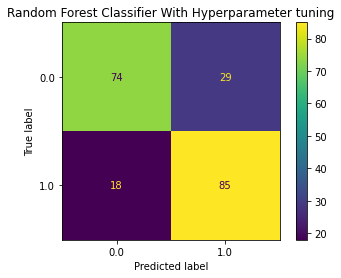

In [131]:
plot_confusion_matrix(rfc_gscv, X_1_test, y_1_test)  
plt.title('Random Forest Classifier With Hyperparameter tuning')
plt.savefig('Confusion Matrix of Random Forest Classifier With Hyperparameter tuning.jpg', dpi = 500)
plt.show() 

In [132]:
TP = conf[0][0]
TN = conf[1][1]
FN = conf[0][1]
FP = conf[1][0]
print('TP of Random Foorest classifier With Hyperparameter Optimization:', TP)
print('TN of Random Foorest classifier With Hyperparameter Optimization:', TN)
print('FN of Random Foorest classifier With Hyperparameter Optimization:', FN)
print('FP of Random Foorest classifier With Hyperparameter Optimization:', FP)

TP of Random Foorest classifier With Hyperparameter Optimization: 74
TN of Random Foorest classifier With Hyperparameter Optimization: 85
FN of Random Foorest classifier With Hyperparameter Optimization: 29
FP of Random Foorest classifier With Hyperparameter Optimization: 18


In [133]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Specificity = TN/(TN+FP)
f_1_score = (2*Precision*Recall)/(Precision + Recall)
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy in Random Foorest classifier With Hyperparameter Tuning::', Accuracy)
print('Precision of Random Foorest classifier With Hyperparameter Optimization:', Precision)
print('Recall of Random Foorest classifier With Hyperparameter Optimization:', Recall)
print('F1 score of Random Foorest classifier With Hyperparameter Optimization:', f_1_score)

Accuracy in Random Foorest classifier With Hyperparameter Tuning:: 0.7718446601941747
Precision of Random Foorest classifier With Hyperparameter Optimization: 0.8043478260869565
Recall of Random Foorest classifier With Hyperparameter Optimization: 0.7184466019417476
F1 score of Random Foorest classifier With Hyperparameter Optimization: 0.7589743589743588


In [134]:
rfc_gscv_pred_proba = rfc_gscv.predict_proba(X_1_test)

In [135]:
fpr_rfc_gscv, tpr_rfc_gscv, thresh_rfc_gscv = roc_curve(y_1_test, rfc_gscv_pred_proba[:,1], pos_label=1)

In [136]:
roc_curve(y_1_test, rfc_gscv_pred_proba[:,1], pos_label=1)

(array([0.        , 0.        , 0.        , 0.00970874, 0.00970874,
        0.01941748, 0.01941748, 0.02912621, 0.02912621, 0.03883495,
        0.03883495, 0.04854369, 0.04854369, 0.05825243, 0.05825243,
        0.06796117, 0.06796117, 0.06796117, 0.0776699 , 0.0776699 ,
        0.09708738, 0.09708738, 0.12621359, 0.12621359, 0.13592233,
        0.13592233, 0.14563107, 0.14563107, 0.16504854, 0.16504854,
        0.19417476, 0.19417476, 0.21359223, 0.21359223, 0.25242718,
        0.25242718, 0.31067961, 0.31067961, 0.38834951, 0.38834951,
        0.39805825, 0.39805825, 0.40776699, 0.40776699, 0.41747573,
        0.41747573, 0.46601942, 0.46601942, 0.50485437, 0.50485437,
        0.53398058, 0.53398058, 0.74757282, 0.74757282, 0.88349515,
        0.88349515, 0.9223301 , 0.9223301 , 1.        ]),
 array([0.        , 0.00970874, 0.17475728, 0.17475728, 0.44660194,
        0.44660194, 0.45631068, 0.45631068, 0.48543689, 0.48543689,
        0.52427184, 0.52427184, 0.58252427, 0.58252427, 0.

In [137]:
random_probs = [0 for i in range(len(y_1_test))]
p_fpr_rfc_gscv, p_tpr_rfc_gscv, _ = roc_curve(y_1_test, random_probs, pos_label=1)

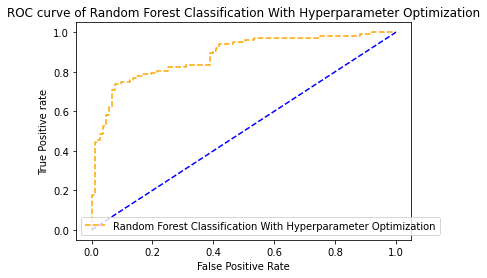

In [138]:
plt.plot(fpr_rfc_gscv, tpr_rfc_gscv, linestyle='--',color='orange', label='Random Forest Classification With Hyperparameter Optimization')
plt.plot(p_fpr_rfc_gscv, p_tpr_rfc_gscv, linestyle='--', color='blue')
# title
plt.title('ROC curve of Random Forest Classification With Hyperparameter Optimization')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC curve of Random Forest Classification With Hyperparameter Optimization.jpg',dpi=500)
plt.show()

In [139]:
print('roc_auc_score for Random Foorest classifier with Hyperparameter tuning:', roc_auc_score(y_1_test, rfc_gscv_pred_proba[:,1]))
score = roc_auc_score(y_1_test, rfc_gscv_pred_proba[:,1])
Random_Forest_With_hyperparaeter_tuning = [Precision, Recall, f_1_score, TP, TN, FP, FN, Accuracy, score]

roc_auc_score for Random Foorest classifier with Hyperparameter tuning: 0.8812329154491471


### K-Neighbors Classifier

In [142]:
knn = KNeighborsClassifier(metric= 'manhattan')
knn.fit(X_1_train, y_1_train)

KNeighborsClassifier(metric='manhattan')

In [143]:
knn_pred = knn.predict(X_1_test)

In [144]:
conf_knn = confusion_matrix(y_1_test, knn_pred)
conf_knn

array([[  6,  97],
       [  1, 102]], dtype=int64)

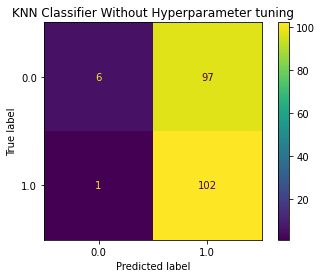

In [145]:
plot_confusion_matrix(knn, X_1_test, y_1_test)  
plt.title('KNN Classifier Without Hyperparameter tuning')
plt.savefig('Confusion Matrix of KNN Classifier Without Hyperparameter tuning.jpg', dpi = 500)
plt.show() 

In [146]:
TP = conf_knn[0][0]
TN = conf_knn[1][1]
FN = conf_knn[0][1]
FP = conf_knn[1][0]
print('TP of KNeighborsClassifier:', TP)
print('TN of KNeighborsClassifier:', TN)
print('FN of KNeighborsClassifier:', FN)
print('FP of KNeighborsClassifier:', FP)

TP of KNeighborsClassifier: 6
TN of KNeighborsClassifier: 102
FN of KNeighborsClassifier: 97
FP of KNeighborsClassifier: 1


In [147]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Specificity = TN/(TN+FP)
f_1_score = (2*Precision*Recall)/(Precision + Recall)
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy in KNeighborsClassifier::', Accuracy)
print('Precision of KNeighborsClassifier:', Precision)
print('Recall of KNeighborsClassifier:', Recall)
print('F1 Score of KNeighborsClassifier:', f_1_score)

Accuracy in KNeighborsClassifier:: 0.5242718446601942
Precision of KNeighborsClassifier: 0.8571428571428571
Recall of KNeighborsClassifier: 0.05825242718446602
F1 Score of KNeighborsClassifier: 0.1090909090909091


In [148]:
knn_pred_proba = knn.predict_proba(X_1_test)

In [149]:
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_1_test, knn_pred_proba[:,1], pos_label=1)

In [150]:
roc_curve(y_1_test, knn_pred_proba[:,1], pos_label=1)

(array([0.        , 0.32038835, 0.73786408, 0.94174757, 0.97087379,
        1.        ]),
 array([0.        , 0.70873786, 0.91262136, 0.99029126, 1.        ,
        1.        ]),
 array([2. , 1. , 0.8, 0.6, 0.4, 0.2]))

In [151]:
random_probs = [0 for i in range(len(y_1_test))]
p_fpr_knn, p_tpr_knn, _ = roc_curve(y_1_test, random_probs, pos_label=1)

In [152]:
p_fpr_knn, p_tpr_knn

(array([0., 1.]), array([0., 1.]))

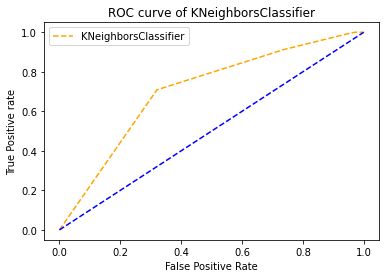

In [153]:
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='orange', label='KNeighborsClassifier')
plt.plot(p_fpr_knn, p_tpr_knn, linestyle='--', color='blue')
# title
plt.title('ROC curve of KNeighborsClassifier')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC curve of KNeighborsClassifier',dpi = 500)
plt.show()

In [154]:
score = print('roc_auc_score for KNeighborsClassifier :', roc_auc_score(y_1_test, knn_pred_proba[:,1]))
score = roc_auc_score(y_1_test, knn_pred_proba[:,1])
KNN = [Precision, Recall, f_1_score, TP, TN, FP, FN, Accuracy, score]

roc_auc_score for KNeighborsClassifier : 0.7040720143274578


### Gradient Boosting without Hyperparameter Optimization

In [157]:
gb = GradientBoostingClassifier()

In [158]:
gb.fit(X_1_train, y_1_train)

GradientBoostingClassifier()

In [159]:
gb_pred = gb.predict(X_1_test)

In [160]:
conf = confusion_matrix(y_1_test, gb_pred)
conf

array([[73, 30],
       [17, 86]], dtype=int64)

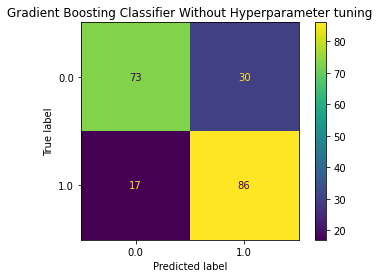

In [161]:
plot_confusion_matrix(gb, X_1_test, y_1_test)  
plt.title('Gradient Boosting Classifier Without Hyperparameter tuning')
plt.savefig('Confusion Matrix of Gradient Boosting Classifier Without Hyperparameter tuning.jpg', dpi = 500)
plt.show() 

In [162]:
TP = conf[0][0]
TN = conf[1][1]
FN = conf[0][1]
FP = conf[1][0]
print('TP of Gradient Boosting classifier Without Hyperparameter Optimization:', TP)
print('TN of Gradient Boosting classifier Without Hyperparameter Optimization:', TN)
print('FN of Gradient Boosting classifier Without Hyperparameter Optimization:', FN)
print('FP of Gradient Boosting classifier Without Hyperparameter Optimization:', FP)

TP of Gradient Boosting classifier Without Hyperparameter Optimization: 73
TN of Gradient Boosting classifier Without Hyperparameter Optimization: 86
FN of Gradient Boosting classifier Without Hyperparameter Optimization: 30
FP of Gradient Boosting classifier Without Hyperparameter Optimization: 17


In [163]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Specificity = TN/(TN+FP)
f_1_score = (2*Precision*Recall)/(Precision + Recall)
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy in Gradient Boosting classifier Without Hyperparameter Tuning::', Accuracy)
print('Precision of Gradient Boosting classifier Without Hyperparameter Optimization:', Precision)
print('Recall of Gradient Boosting classifier Without Hyperparameter Optimization:', Recall)
print('F1 Score of Gradient Boosting classifier Without Hyperparameter Optimization:', f_1_score)

Accuracy in Gradient Boosting classifier Without Hyperparameter Tuning:: 0.7718446601941747
Precision of Gradient Boosting classifier Without Hyperparameter Optimization: 0.8111111111111111
Recall of Gradient Boosting classifier Without Hyperparameter Optimization: 0.7087378640776699
F1 Score of Gradient Boosting classifier Without Hyperparameter Optimization: 0.756476683937824


In [164]:
gb_pred_proba = gb.predict_proba(X_1_test)

In [165]:
fpr_gb, tpr_gb, thresh_gb = roc_curve(y_1_test, gb_pred_proba[:,1], pos_label=1)

In [166]:
roc_curve(y_1_test, gb_pred_proba[:,1], pos_label=1)

(array([0.        , 0.00970874, 0.00970874, 0.01941748, 0.01941748,
        0.01941748, 0.01941748, 0.01941748, 0.01941748, 0.02912621,
        0.02912621, 0.03883495, 0.03883495, 0.04854369, 0.04854369,
        0.04854369, 0.05825243, 0.05825243, 0.05825243, 0.05825243,
        0.06796117, 0.06796117, 0.06796117, 0.0776699 , 0.0776699 ,
        0.08737864, 0.08737864, 0.08737864, 0.08737864, 0.11650485,
        0.11650485, 0.12621359, 0.13592233, 0.13592233, 0.14563107,
        0.15533981, 0.15533981, 0.17475728, 0.17475728, 0.19417476,
        0.19417476, 0.2038835 , 0.2038835 , 0.22330097, 0.22330097,
        0.24271845, 0.24271845, 0.25242718, 0.25242718, 0.26213592,
        0.26213592, 0.27184466, 0.27184466, 0.2815534 , 0.29126214,
        0.29126214, 0.31067961, 0.31067961, 0.33009709, 0.33009709,
        0.37864078, 0.37864078, 0.38834951, 0.38834951, 0.39805825,
        0.39805825, 0.40776699, 0.40776699, 0.44660194, 0.44660194,
        0.46601942, 0.46601942, 0.47572816, 0.47

In [167]:
random_probs = [0 for i in range(len(y_1_test))]
p_fpr_gb, p_tpr_gb, _ = roc_curve(y_1_test, random_probs, pos_label=1)

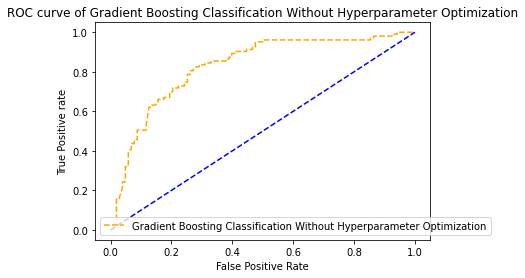

In [168]:
plt.plot(fpr_gb, tpr_gb, linestyle='--',color='orange', label='Gradient Boosting Classification Without Hyperparameter Optimization')
plt.plot(p_fpr_gb, p_tpr_gb, linestyle='--', color='blue')
# title
plt.title('ROC curve of Gradient Boosting Classification Without Hyperparameter Optimization')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC curve of Gradient Boosting Classification Without Hyperparameter Optimization.jpg',dpi=500)
plt.show()

In [169]:
score = print('roc_auc_score for Gradient Boosting Classification Without Hyperparameter Optimization :', roc_auc_score(y_1_test, gb_pred_proba[:,1]))
score = roc_auc_score(y_1_test, gb_pred_proba[:,1])
Gradient_Boosting_Without_hyperparaeter_tuning = [Precision, Recall, f_1_score, TP, TN, FP, FN, Accuracy, score]

roc_auc_score for Gradient Boosting Classification Without Hyperparameter Optimization : 0.8286360637194834


### Gradient Boosting With Hyperparameter Tuning

In [193]:
gb_params = {
    'learning_rate' : [0.01, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators' : [100, 300, 500, 800, 1200],
    'max_depth' : [8, 16, 24, 32],
    'min_samples_split' : [0.1, 0.25, 0.5, 0.75, 1.0]
}
gb_gscv = GridSearchCV(estimator= gb, param_grid= gb_params, n_jobs = 3, cv = 5, verbose = 2, scoring = 'f1')

In [194]:
gb_gscv.fit(X_1_train, y_1_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   22.8s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:  4.4min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:  7.5min
[Parallel(n_jobs=3)]: Done 1007 tasks      | elapsed: 12.0min
[Parallel(n_jobs=3)]: Done 1452 tasks      | elapsed: 17.6min
[Parallel(n_jobs=3)]: Done 1979 tasks      | elapsed: 23.7min
[Parallel(n_jobs=3)]: Done 2586 tasks      | elapsed: 30.9min
[Parallel(n_jobs=3)]: Done 3000 out of 3000 | elapsed: 38.4min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.01, 0.1, 0.25, 0.5, 0.75, 1],
                         'max_depth': [8, 16, 24, 32],
                         'min_samples_split': [0.1, 0.25, 0.5, 0.75, 1.0],
                         'n_estimators': [100, 300, 500, 800, 1200]},
             scoring='f1', verbose=2)

In [195]:
gb_gscv_pred = gb_gscv.predict(X_1_test)

In [196]:
conf = confusion_matrix(y_1_test, gb_gscv_pred)
conf

array([[83, 20],
       [20, 83]], dtype=int64)

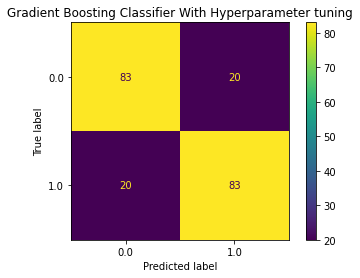

In [197]:
plot_confusion_matrix(gb_gscv, X_1_test, y_1_test) 
plt.title('Gradient Boosting Classifier With Hyperparameter tuning')
plt.savefig('Confusion MAtrix of Gradient Boosting Classifier With Hyperparameter tuning.jpg', dpi = 500)
plt.show() 

In [198]:
TP = conf[0][0]
TN = conf[1][1]
FN = conf[0][1]
FP = conf[1][0]
print('TP of Gradient Boosting classifier With Hyperparameter Optimization:', TP)
print('TN of Gradient Boosting classifier With Hyperparameter Optimization:', TN)
print('FN of Gradient Boosting classifier With Hyperparameter Optimization:', FN)
print('FP of Gradient Boosting classifier With Hyperparameter Optimization:', FP)

TP of Gradient Boosting classifier With Hyperparameter Optimization: 83
TN of Gradient Boosting classifier With Hyperparameter Optimization: 83
FN of Gradient Boosting classifier With Hyperparameter Optimization: 20
FP of Gradient Boosting classifier With Hyperparameter Optimization: 20


In [199]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Specificity = TN/(TN+FP)
f_1_score = (2*Precision*Recall)/(Precision + Recall)
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy in Gradient Boosting classifier With Hyperparameter Tuning::', Accuracy)
print('Precision of Gradient Boosting classifier With Hyperparameter Optimization:', Precision)
print('Recall of Gradient Boosting classifier With Hyperparameter Optimization:', Recall)
print('F1 Score of Gradient Boosting classifier With Hyperparameter Optimization:', f_1_score)

Accuracy in Gradient Boosting classifier With Hyperparameter Tuning:: 0.8058252427184466
Precision of Gradient Boosting classifier With Hyperparameter Optimization: 0.8058252427184466
Recall of Gradient Boosting classifier With Hyperparameter Optimization: 0.8058252427184466
F1 Score of Gradient Boosting classifier With Hyperparameter Optimization: 0.8058252427184465


In [200]:
gb_gscv_pred_proba = gb_gscv.predict_proba(X_1_test)

In [201]:
fpr_gb_gscv, tpr_gb_gscv, thresh_gb_gscv = roc_curve(y_1_test, gb_gscv_pred_proba[:,1], pos_label=1)

In [202]:
roc_curve(y_1_test, gb_gscv_pred_proba[:,1], pos_label=1)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00970874, 0.00970874,
        0.00970874, 0.00970874, 0.01941748, 0.01941748, 0.03883495,
        0.03883495, 0.04854369, 0.04854369, 0.05825243, 0.05825243,
        0.06796117, 0.06796117, 0.0776699 , 0.0776699 , 0.08737864,
        0.08737864, 0.09708738, 0.09708738, 0.10679612, 0.10679612,
        0.12621359, 0.12621359, 0.13592233, 0.13592233, 0.14563107,
        0.14563107, 0.17475728, 0.17475728, 0.18446602, 0.18446602,
        0.2038835 , 0.2038835 , 0.21359223, 0.21359223, 0.25242718,
        0.25242718, 0.2815534 , 0.2815534 , 0.29126214, 0.29126214,
        0.33009709, 0.33009709, 0.40776699, 0.40776699, 0.41747573,
        0.41747573, 0.44660194, 0.44660194, 0.48543689, 0.48543689,
        0.53398058, 0.53398058, 0.61165049, 0.61165049, 0.74757282,
        0.74757282, 0.78640777, 0.78640777, 0.80582524, 0.80582524,
        0.9223301 , 0.9223301 , 1.        ]),
 a

In [203]:
random_probs = [0 for i in range(len(y_1_test))]
p_fpr_gb_gscv, p_tpr_gb_gscv, _ = roc_curve(y_1_test, random_probs, pos_label=1)

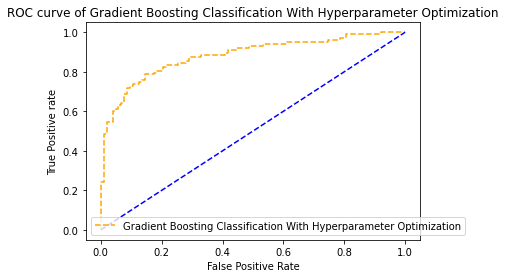

In [204]:
plt.plot(fpr_gb_gscv, tpr_gb_gscv, linestyle='--',color='orange', label='Gradient Boosting Classification With Hyperparameter Optimization')
plt.plot(p_fpr_gb_gscv, p_tpr_gb_gscv, linestyle='--', color='blue')
# title
plt.title('ROC curve of Gradient Boosting Classification With Hyperparameter Optimization')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC curve of Gradient Boosting Classification With Hyperparameter Optimization.jpg',dpi=500)
plt.show()

In [205]:
score = print('roc_auc_score for Gradient Boosting Classification With Hyperparameter Optimization :', roc_auc_score(y_1_test, gb_gscv_pred_proba[:,1]))
score = roc_auc_score(y_1_test, gb_gscv_pred_proba[:,1])
Gradient_Boosting_With_hyperparaeter_tuning = [Precision, Recall, f_1_score, TP, TN, FP, FN, Accuracy, score]

roc_auc_score for Gradient Boosting Classification With Hyperparameter Optimization : 0.8816099538128005


In [208]:
vals = [Logistic_Regression, Logistic_Regression_With_hyperparaeter_tuning, Decision_Tree_Without_hyperparaeter_tuning, 
       Decision_Tree_With_hyperparaeter_tuning, KNN, Random_Forest_Without_hyperparaeter_tuning, Random_Forest_With_hyperparaeter_tuning,
       Gradient_Boosting_Without_hyperparaeter_tuning, Gradient_Boosting_With_hyperparaeter_tuning]

In [209]:
a = pd.DataFrame(vals)
a

,0,1,2,3,4,5,6,7,8
0,0.839623,0.864078,0.851675,89,86,17,14,0.849515,0.892638
1,0.810811,0.873786,0.841121,90,82,21,13,0.834951,0.896503
2,0.790000,0.766990,0.778325,79,82,21,24,0.781553,0.781553
3,0.813725,0.805825,0.809756,83,84,19,20,0.810680,0.850363
4,0.857143,0.058252,0.109091,6,102,1,97,0.524272,0.704072
5,0.849462,0.766990,0.806122,79,89,14,24,0.815534,0.895325
6,0.804348,0.718447,0.758974,74,85,18,29,0.771845,0.881233
7,0.811111,0.708738,0.756477,73,86,17,30,0.771845,0.828636
8,0.805825,0.805825,0.805825,83,83,20,20,0.805825,0.881610


In [210]:
names = ['Logistic_Regression', 'Logistic_Regression_With_hyperparaeter_tuning', 'Decision_Tree_Without_hyperparaeter_tuning', 
       'Decision_Tree_With_hyperparaeter_tuning', 'KNN', 'Random_Forest_Without_hyperparaeter_tuning', 'Random_Forest_With_hyperparaeter_tuning',
       'Gradient_Boosting_Without_hyperparaeter_tuning', 'Gradient_Boosting_With_hyperparaeter_tuning']
names = pd.DataFrame(names)
names

,0
0,Logistic_Regression
1,Logistic_Regression_With_hyperparaeter_tuning
2,Decision_Tree_Without_hyperparaeter_tuning
3,Decision_Tree_With_hyperparaeter_tuning
4,KNN
5,Random_Forest_Without_hyperparaeter_tuning
6,Random_Forest_With_hyperparaeter_tuning
7,Gradient_Boosting_Without_hyperparaeter_tuning
8,Gradient_Boosting_With_hyperparaeter_tuning


In [212]:
df_result = a.merge(names, right_index= True, left_index= True)
#df_result.columns = ['Precision', 'Recall', 'f_1_score', 'TP', 'TN', 'FP', 'FN', 'Accuracy', 'AUC_ROC-score']
df_result

,0_x,1,2,3,4,5,6,7,8,0_y
0,0.839623,0.864078,0.851675,89,86,17,14,0.849515,0.892638,Logistic_Regression
1,0.810811,0.873786,0.841121,90,82,21,13,0.834951,0.896503,Logistic_Regression_With_hyperparaeter_tuning
2,0.790000,0.766990,0.778325,79,82,21,24,0.781553,0.781553,Decision_Tree_Without_hyperparaeter_tuning
3,0.813725,0.805825,0.809756,83,84,19,20,0.810680,0.850363,Decision_Tree_With_hyperparaeter_tuning
4,0.857143,0.058252,0.109091,6,102,1,97,0.524272,0.704072,KNN
5,0.849462,0.766990,0.806122,79,89,14,24,0.815534,0.895325,Random_Forest_Without_hyperparaeter_tuning
6,0.804348,0.718447,0.758974,74,85,18,29,0.771845,0.881233,Random_Forest_With_hyperparaeter_tuning
7,0.811111,0.708738,0.756477,73,86,17,30,0.771845,0.828636,Gradient_Boosting_Without_hyperparaeter_tuning
8,0.805825,0.805825,0.805825,83,83,20,20,0.805825,0.881610,Gradient_Boosting_With_hyperparaeter_tuning


In [ ]:
Gradient_Boosting_Without_hyperparaeter_tuning

In [215]:
df_result.columns = ['Precision', 'Recall', 'f_1_score', 'TP', 'TN', 'FP', 'FN', 'Accuracy', 'AUC-ROC Score', 'Model']

In [216]:
df_result

,Precision,Recall,f_1_score,TP,TN,FP,FN,Accuracy,AUC-ROC Score,Model
0,0.839623,0.864078,0.851675,89,86,17,14,0.849515,0.892638,Logistic_Regression
1,0.810811,0.873786,0.841121,90,82,21,13,0.834951,0.896503,Logistic_Regression_With_hyperparaeter_tuning
2,0.790000,0.766990,0.778325,79,82,21,24,0.781553,0.781553,Decision_Tree_Without_hyperparaeter_tuning
3,0.813725,0.805825,0.809756,83,84,19,20,0.810680,0.850363,Decision_Tree_With_hyperparaeter_tuning
4,0.857143,0.058252,0.109091,6,102,1,97,0.524272,0.704072,KNN
5,0.849462,0.766990,0.806122,79,89,14,24,0.815534,0.895325,Random_Forest_Without_hyperparaeter_tuning
6,0.804348,0.718447,0.758974,74,85,18,29,0.771845,0.881233,Random_Forest_With_hyperparaeter_tuning
7,0.811111,0.708738,0.756477,73,86,17,30,0.771845,0.828636,Gradient_Boosting_Without_hyperparaeter_tuning
8,0.805825,0.805825,0.805825,83,83,20,20,0.805825,0.881610,Gradient_Boosting_With_hyperparaeter_tuning


In [64]:

filename = 'Project_1.pkl'
with open(filename, 'wb') as file:
    pickle.dump(lr, file)